engine_displacement
[170 130 220 210 190]
36

horsepower
[159.  97.  78.  nan 140.]
192

vehicle_weight
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

model_year
[2003 2007 2018 2009 2008]
24

fuel_efficiency_mpg
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704

Max fuel efficiency value: 25.96722204888372
The histplot for the the fuel_efficiency_mpg variable shows a bell curve shape. Hence, it has a normal distribution and not a tail distribution.
The one column with missing values: horsepower
The median (50% percentile) for variable 'horsepower': 149.0


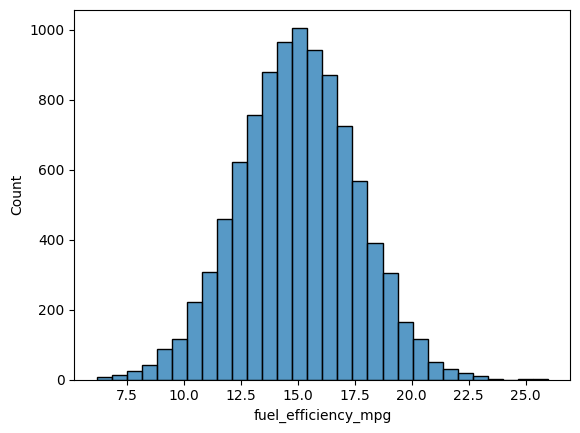

In [159]:
import pandas as pd
import numpy as np

# Dataset

# For this homework, we'll use the Car Fuel Efficiency dataset. Download it from here (https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv).

# You can do it with wget:

# wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
#df.head()

# The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

# Preparing the dataset

# Use only the following columns:

# 'engine_displacement',
# 'horsepower',
# 'vehicle_weight',
# 'model_year',
# 'fuel_efficiency_mpg'
prepared_dataset = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
#prepared_dataset.head()



# EDA

# Look at the fuel_efficiency_mpg variable. Does it have a long tail?

prepared_dataset.columns
for col in prepared_dataset.columns:
    print(col)
    print(prepared_dataset[col].unique()[:5])
    print(prepared_dataset[col].nunique())
    print()

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
fuel_efficiency_mpg_max_val = prepared_dataset['fuel_efficiency_mpg'].max()
print(f"Max fuel efficiency value: {fuel_efficiency_mpg_max_val}")
sns.histplot(prepared_dataset.fuel_efficiency_mpg, bins=30) # setting bin size to 30 since max fuel_efficiency_mpg value is 25.96
print("The histplot for the the fuel_efficiency_mpg variable shows a bell curve shape. Hence, it has a normal distribution and not a tail distribution.")

#Question 1

#There's one column with missing values. What is it?

# 'engine_displacement'
# 'horsepower'
# 'vehicle_weight'
# 'model_year'

missing_value_column = prepared_dataset.columns[prepared_dataset.isna().any()]
print(f"The one column with missing values: {missing_value_column[0]}")



# Question 2

# What's the median (50% percentile) for variable 'horsepower'?
horsepower_median = prepared_dataset['horsepower'].median()
print(f"The median (50% percentile) for variable 'horsepower': {horsepower_median}")


The number of records in the filtered dataset: 9704
For train/val/test sets, 60% of all records will roughly yield 5824 records for training
Next, 20% of all records will roughly yield 1940 records for validation
Lastly, the remainder 20% of all records will roughly yield 1940 records for testing

Sequence of numbers representing each record: [   0    1    2 ... 9701 9702 9703]
Shuffled sequence with 42 seed: [ 483 7506 8795 ... 5390  860 7270]

After shuffling, splitting, and resetting the indices, the number of records in the training set: 5824
After shuffling, splitting, and resetting the indices, the number of records in the validation set: 1940
After shuffling, splitting, and resetting the indices, the number of records in the testing set: 1940
Horsepower mean from training dataset: 149.54476367006487

y_pred_zero: [16.0373382  14.92522236 11.86445895 ... 13.69560868 13.62575126
 16.44936805]
y_pred_mean: [15.73837498 14.80338305 12.03624928 ... 14.01482574 13.72161355
 16.193629

<Axes: ylabel='Count'>

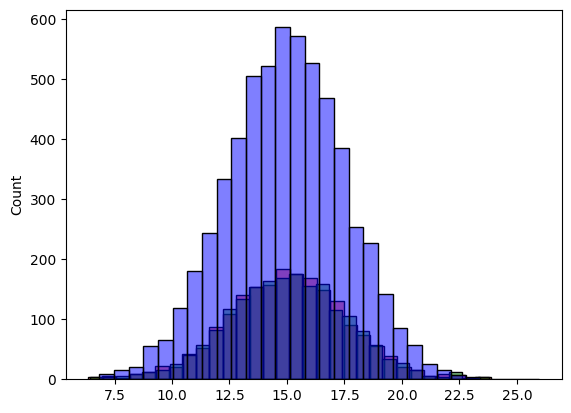

In [162]:
# Prepare and split the dataset

# Shuffle the dataset (the filtered one you created above), use seed 42.
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
# Use the same code as in the lectures
print()
#prepared_dataset.isnull().sum()

records_count = len(prepared_dataset)
print(f"The number of records in the filtered dataset: {records_count}")

n_valid = int(records_count * 0.20)
n_test = int(records_count * 0.20)
n_train = records_count - (n_valid + n_test)

print(f"For train/val/test sets, 60% of all records will roughly yield {n_train} records for training")
print(f"Next, 20% of all records will roughly yield {n_valid} records for validation")
print(f"Lastly, the remainder 20% of all records will roughly yield {n_test} records for testing")

#valid_dataset = prepared_dataset.iloc[:n_valid]
#test_dataset = prepared_dataset.iloc[n_valid:n_valid+n_test]
#train_dataset = prepared_dataset.iloc[n_valid+n_test:]
print()

idx = np.arange(records_count)
print(f"Sequence of numbers representing each record: {idx}")
np.random.seed(42)
np.random.shuffle(idx)
print(f"Shuffled sequence with 42 seed: {idx}")

print()
train_dataset = prepared_dataset.iloc[idx[:n_train]].reset_index(drop=True)
valid_dataset = prepared_dataset.iloc[idx[n_train:n_train+n_valid]].reset_index(drop=True)
test_dataset = prepared_dataset.iloc[idx[n_train+n_valid:]].reset_index(drop=True)
print(f"After shuffling, splitting, and resetting the indices, the number of records in the training set: {len(train_dataset)}")
print(f"After shuffling, splitting, and resetting the indices, the number of records in the validation set: {len(valid_dataset)}")
print(f"After shuffling, splitting, and resetting the indices, the number of records in the testing set: {len(test_dataset)}")
#train_dataset

# Question 3

# We need to deal with missing values for the column from Q1.
# We have two options: fill it with 0 or with the mean of this variable.
# Try both options. For each, train a linear regression model without regularization using the code from the lessons.
# For computing the mean, use the training only!
# Use the validation dataset to evaluate the models and compare the RMSE of each option.
# Round the RMSE scores to 2 decimal digits using round(score, 2)
# Which option gives better RMSE?
# Options:

# With 0
# With mean
# Both are equally good

horsepower_mean = train_dataset['horsepower'].mean()
print(f"Horsepower mean from training dataset: {horsepower_mean}")

# y
y_train = train_dataset.fuel_efficiency_mpg.values
#print(y_train)
y_valid = valid_dataset.fuel_efficiency_mpg.values
#print(y_valid)
y_test = test_dataset.fuel_efficiency_mpg.values
#print(y_test)

# del
del train_dataset['fuel_efficiency_mpg']
del valid_dataset['fuel_efficiency_mpg']
del test_dataset['fuel_efficiency_mpg']

# FILLED WITH ZERO SETS
X_train_zero = train_dataset.copy()
X_train_zero['horsepower'] = X_train_zero['horsepower'].fillna(0)
X_train_zero = X_train_zero.values

X_valid_zero = valid_dataset.copy()
X_valid_zero['horsepower'] = X_valid_zero['horsepower'].fillna(0)
X_valid_zero = X_valid_zero.values

X_test_zero = test_dataset.copy()
X_test_zero['horsepower'] = X_test_zero['horsepower'].fillna(0)
X_test_zero = X_test_zero.values

# FILLED WITH MEAN SETS
X_train_mean = train_dataset.copy()
X_train_mean['horsepower'] = X_train_mean['horsepower'].fillna(horsepower_mean)
X_train_mean = X_train_mean.values

X_valid_mean = valid_dataset.copy()
X_valid_mean ['horsepower'] = X_valid_mean['horsepower'].fillna(horsepower_mean)
X_valid_mean = X_valid_mean.values

X_test_mean = test_dataset.copy()
X_test_mean['horsepower'] = X_test_mean['horsepower'].fillna(horsepower_mean)
X_test_mean = X_test_mean.values

#filled_with_zero_train.iloc[10]

# engine_displacement = 240.000000
# horsepower = 159.000000
# vehicle_weight = 2916.987921
# Selecting engine_displacement, horsepower, vehicle_weight columns
# xi = [240.000000, 159.000000, 2916.987921]

#w0 = 7.17
#w = [0.01, 0.04, 0.002]
#w_new = [w0] + w

#xi = [453, 11, 86]
#x1 = [1, 148, 24, 1385]
#x2 = [1, 
#print(X.dot(w_new))
#x1 = [220.0, 144.0, 2535.887591] # record 0
#x2 = [150.0, 206.0, 3748.164469] # record 3
#x3 = [210.0, 152.0, 2500.175687] # record 5821
#x4 = [160.0, 176.0, 2570.837729] # record 175
#x5 = [150.0, 199.0, 3427.485198] # record 278
#x6 = [300.0, 121.0, 3263.630535] # record 1003
#x7 = [270.0, 150.0, 2795.939826] # record 2052
#x8 = [200.0, 206.0, 4021.817930] # record 3501
#x9 = [210.0, 197.0, 3109.864762] # record 4620

#X = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
#X = np.array(X)
#ones = np.ones(X.shape[0])
#X = np.column_stack([ones, X])

#print(X)

#XTX = X.T.dot(X) # XTX is the gram matrix
#print(XTX)

#XTX_inv = np.linalg.inv(XTX) # XTX_inv is the inverse of the gram matrix
#print(XTX_inv)

#print(XTX.dot(XTX_inv).round(1)) Testing for identity matrix

#y_train = [100, 250, 150, 250, 100, 200, 150, 250, 120]
# w_full = XTX_inv.dot(X.T).dot(y)
# w0 = w_full[0]
# w = w_full[1:]


def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + xi[j] * w[j]

    return res

def linear_regression(X):
    return X.dot(w_new)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

#X_train_zero = filled_with_zero_train.values
#print(train_linear_regression(X, y))

#X_train_mean = filled_with_mean_train.values
#print(train_linear_regression(X,y))
#lin_reg_zero_log = linear_regression(X)
#print(f"Linear regression with zero log: {lin_reg_zero_log}")
#lin_reg_zero_result = np.expm1(lin_reg_zero_log)
#print(f"Linear regression result: {lin_reg_zero_result}")


w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
#print(f"w0 for zero: {w0_zero}")
#print(f"w for zero: {w_zero}")

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
#print(f"w0 for mean: {w0_mean}")
#print(f"w for mean: {w_mean}")

#y_pred_zero = w0_zero + X_train_zero.dot(w_zero)
#y_pred_mean = w0_mean + X_train_mean.dot(w_mean)

#sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=30)
#sns.histplot(y_pred_mean, color='green', alpha=0.5, bins=30)
#sns.histplot(y_train, color='blue', alpha=0.5, bins=30)


def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

#print(f"RMSE for zero filled: {round(rmse(y_train, y_pred_zero),2)}")
#print(f"RMSE for mean filled: {round(rmse(y_train, y_pred_mean),2)}")

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

y_pred_zero = w0_zero + X_valid_zero.dot(w_zero)
print(f"\ny_pred_zero: {y_pred_zero}")
y_pred_mean = w0_mean + X_valid_mean.dot(w_mean)
print(f"y_pred_mean: {y_pred_mean}")

print(f"\nRMSE for zero filled: {round(rmse(y_valid, y_pred_zero),2)}")
print(f"RMSE for mean filled: {round(rmse(y_valid, y_pred_mean),2)}")
print(f"Although nearly equal in value, filling NAs with mean gives better RMSE since lower RMSE is better (0.46 mean filled < 0.52 zero filled")

sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=30)
sns.histplot(y_pred_mean, color='green', alpha=0.5, bins=30)
sns.histplot(y_train, color='blue', alpha=0.5, bins=30)

#print(filled_with_zero_train.iloc[175])
#print(filled_with_zero_train.iloc[278])
#print(filled_with_zero_train.iloc[1003])
#print(filled_with_zero_train.iloc[2052])
#print(filled_with_zero_train.iloc[3501])
#print(filled_with_zero_train.iloc[4620])

In [163]:
# Question 4

# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.
# Which r gives the best RMSE?

# If multiple options give the same best RMSE, select the smallest r.
#X_train_zero

def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

w0_for_r0, w_for_r0 = train_linear_regression_reg(X_train_zero, y_train, r=0)
#print(f"\nw0_for_r0: {w0_for_r0}")
#print(f"w_for_r0: {w_for_r0}")
y_pred_for_r0 = w0_for_r0 + X_valid_zero.dot(w_for_r0)
#print(f"y_pred_for_r0: {y_pred_for_r0}")
print(f"RMSE for r0 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r0),2)}")
#print(f"RMSE for r0: {rmse(y_valid, y_pred_for_r0)}")

w0_for_r001, w_for_r001 = train_linear_regression_reg(X_train_zero, y_train, r=0.01)
#print(f"\nw0_for_r001: {w0_for_r001}")
#print(f"w_for_r001: {w_for_r001}")
y_pred_for_r001 = w0_for_r001 + X_valid_zero.dot(w_for_r001)
#print(f"y_pred_for_r001: {y_pred_for_r001}")
print(f"RMSE for r0.01 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r001),2)}")
#print(f"RMSE for r001: {rmse(y_valid, y_pred_for_r001)}")

w0_for_r01, w_for_r01 = train_linear_regression_reg(X_train_zero, y_train, r=0.1)
#print(f"\nw0_for_r01: {w0_for_r01}")
#print(f"w_for_r01: {w_for_r01}")
y_pred_for_r01 = w0_for_r01 + X_valid_zero.dot(w_for_r01)
#print(f"y_pred_for_r01: {y_pred_for_r01}")
print(f"RMSE for r0.1 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r01),2)}")
#print(f"RMSE for r01: {rmse(y_valid, y_pred_for_r01)}")

w0_for_r1, w_for_r1 = train_linear_regression_reg(X_train_zero, y_train, r=1)
#print(f"\nw0_for_r1: {w0_for_r1}")
#print(f"w_for_r1: {w_for_r1}")
y_pred_for_r1 = w0_for_r1 + X_valid_zero.dot(w_for_r1)
#print(f"y_pred_for_r1: {y_pred_for_r1}")
print(f"RMSE for r1 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r1),2)}")
#print(f"RMSE for r1: {rmse(y_valid, y_pred_for_r1)}")

w0_for_r5, w_for_r5 = train_linear_regression_reg(X_train_zero, y_train, r=5)
#print(f"\nw0_for_r5: {w0_for_r5}")
#print(f"w_for_r5: {w_for_r5}")
y_pred_for_r5 = w0_for_r5 + X_valid_zero.dot(w_for_r5)
#print(f"y_pred_for_r5: {y_pred_for_r5}")
print(f"RMSE for r5 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r5),2)}")
#print(f"RMSE for r5: {rmse(y_valid, y_pred_for_r5)}")

w0_for_r10, w_for_r10 = train_linear_regression_reg(X_train_zero, y_train, r=10)
#print(f"\nw0_for_r10: {w0_for_r10}")
#print(f"w_for_r10: {w_for_r10}")
y_pred_for_r10 = w0_for_r10 + X_valid_zero.dot(w_for_r10)
#print(f"y_pred_for_r10: {y_pred_for_r10}")
print(f"RMSE for r10 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r10),2)}")
#print(f"RMSE for r10: {rmse(y_valid, y_pred_for_r10)}")

w0_for_r100, w_for_r100 = train_linear_regression_reg(X_train_zero, y_train, r=100)
#print(f"\nw0_for_r100: {w0_for_r100}")
#print(f"w_for_r100: {w_for_r100}")
y_pred_for_r100 = w0_for_r100 + X_valid_zero.dot(w_for_r100)
#print(f"y_pred_for_r100: {y_pred_for_r100}")
print(f"RMSE for r100 rounded to 2 decimal digits: {round(rmse(y_valid, y_pred_for_r100),2)}")
#print(f"RMSE for r100: {rmse(y_valid, y_pred_for_r100)}")

print("All r values from [0, 0.01, 0.1, 1, 5, 10, 100] yield the same RMSE when rounded to 2 decimal digits.")
print("Hence, the smallest r giving the best RMSE is 0")

RMSE for r0 rounded to 2 decimal digits: 0.52
RMSE for r0.01 rounded to 2 decimal digits: 0.52
RMSE for r0.1 rounded to 2 decimal digits: 0.52
RMSE for r1 rounded to 2 decimal digits: 0.52
RMSE for r5 rounded to 2 decimal digits: 0.52
RMSE for r10 rounded to 2 decimal digits: 0.52
RMSE for r100 rounded to 2 decimal digits: 0.52
All r values from [0, 0.01, 0.1, 1, 5, 10, 100] yield the same RMSE when rounded to 2 decimal digits.
Hence, the smallest r giving the best RMSE is 0


In [151]:
# Question 5

# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))
# What's the value of std?

# Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
RMSE_scores = np.array([])

for seed in seed_values:
    idx_feed = np.arange(records_count)
    np.random.seed(seed)
    np.random.shuffle(idx_feed)

    train_dataset_feed = prepared_dataset.iloc[idx_feed[:n_train]].reset_index(drop=True)
    valid_dataset_feed = prepared_dataset.iloc[idx_feed[n_train:n_train+n_valid]].reset_index(drop=True)
    test_dataset_feed = prepared_dataset.iloc[idx_feed[n_train+n_valid:]].reset_index(drop=True)

    y_train_feed = train_dataset_feed.fuel_efficiency_mpg.values
    y_valid_feed = valid_dataset_feed.fuel_efficiency_mpg.values
    y_test_feed = test_dataset_feed.fuel_efficiency_mpg.values

    del train_dataset_feed['fuel_efficiency_mpg']
    del valid_dataset_feed['fuel_efficiency_mpg']
    del test_dataset_feed['fuel_efficiency_mpg']

    X_train_feed = train_dataset_feed.copy()
    X_train_feed['horsepower'] = X_train_feed['horsepower'].fillna(0)
    X_train_feed = X_train_feed.values
    X_valid_feed = valid_dataset_feed.copy()
    X_valid_feed['horsepower'] = X_valid_feed['horsepower'].fillna(0)
    X_valid_feed = X_valid_feed.values

    w0, w = train_linear_regression(X_train_feed, y_train_feed)
    y_pred_feed = w0 + X_valid_feed.dot(w)
    #print(f"RMSE for {seed} feed: {round(rmse(y_valid_feed, y_pred_feed),2)}")
    RMSE_scores = np.append(RMSE_scores, rmse(y_valid_feed, y_pred_feed))

print(f"RMSE_scores: {RMSE_scores}")
print(f"The standard deviation of all the RMSE scores: {np.std(RMSE_scores)}")
print(f"The standard deviation of all the RMSE scores rounded to 3 decimal digits: {round(np.std(RMSE_scores), 3)}")
    

# idx_0_feed = np.arange(records_count)
# np.random.seed(0)
# np.random.shuffle(idx_0_feed)
# #print(f"\nShuffled sequence with 0 seed: {idx_0_feed}")
# train_dataset_0_feed = prepared_dataset.iloc[idx_0_feed[:n_train]].reset_index(drop=True)
# valid_dataset_0_feed = prepared_dataset.iloc[idx_0_feed[n_train:n_train+n_valid]].reset_index(drop=True)
# test_dataset_0_feed = prepared_dataset.iloc[idx_0_feed[n_train+n_valid:]].reset_index(drop=True)
# print(f"train_dataset_0_feed.iloc[10]: {train_dataset_0_feed.iloc[10]}")
# print(f"valid_dataset_0_feed.iloc[10]: {valid_dataset_0_feed.iloc[10]}")
# print(f"test_dataset_0_feed.iloc[10]: {test_dataset_0_feed.iloc[10]}")

# y_train_0_feed = train_dataset_0_feed.fuel_efficiency_mpg.values
# y_valid_0_feed = valid_dataset_0_feed.fuel_efficiency_mpg.values
# y_test_0_feed = test_dataset_0_feed.fuel_efficiency_mpg.values

# del train_dataset_0_feed['fuel_efficiency_mpg']
# del valid_dataset_0_feed['fuel_efficiency_mpg']
# del test_dataset_0_feed['fuel_efficiency_mpg']

# X_train_0_feed = train_dataset_0_feed.copy()
# X_train_0_feed['horsepower'] = X_train_0_feed['horsepower'].fillna(0)
# X_train_0_feed = X_train_0_feed.values
# X_valid_0_feed = valid_dataset_0_feed.copy()
# X_valid_0_feed['horsepower'] = X_valid_0_feed['horsepower'].fillna(0)
# X_valid_0_feed = X_valid_0_feed.values



# idx_1_feed = np.arange(records_count)
# np.random.seed(1)
# np.random.shuffle(idx_1_feed)
# print(f"\nShuffled sequence with 1 seed: {idx_1_feed}")
# train_dataset_1_feed = prepared_dataset.iloc[idx_1_feed[:n_train]].reset_index(drop=True)
# valid_dataset_1_feed = prepared_dataset.iloc[idx_1_feed[n_train:n_train+n_valid]].reset_index(drop=True)
# test_dataset_1_feed = prepared_dataset.iloc[idx_1_feed[n_train+n_valid:]].reset_index(drop=True)
# print(f"train_dataset_1_feed.iloc[10]: {train_dataset_1_feed.iloc[10]}")

# y_train_1_feed = train_dataset_1_feed.fuel_efficiency_mpg.values
# y_valid_1_feed = valid_dataset_1_feed.fuel_efficiency_mpg.values
# y_test_1_feed = test_dataset_1_feed.fuel_efficiency_mpg.values

# del train_dataset_1_feed['fuel_efficiency_mpg']
# del valid_dataset_1_feed['fuel_efficiency_mpg']
# del test_dataset_1_feed['fuel_efficiency_mpg']

# X_train_1_feed = train_dataset_1_feed.copy()
# X_train_1_feed['horsepower'] = X_train_1_feed['horsepower'].fillna(0)
# X_train_1_feed = X_train_1_feed.values
# X_valid_1_feed = valid_dataset_1_feed.copy()
# X_valid_1_feed['horsepower'] = X_valid_1_feed['horsepower'].fillna(0)
# X_valid_1_feed = X_valid_1_feed.values



# idx_2_feed = np.arange(records_count)
# np.random.seed(2)
# np.random.shuffle(idx_2_feed)
# print(f"\nShuffled sequence with 2 seed: {idx_2_feed}")
# train_dataset_2_feed = prepared_dataset.iloc[idx_2_feed[:n_train]].reset_index(drop=True)
# valid_dataset_2_feed = prepared_dataset.iloc[idx_2_feed[n_train:n_train+n_valid]].reset_index(drop=True)
# test_dataset_2_feed = prepared_dataset.iloc[idx_2_feed[n_train+n_valid:]].reset_index(drop=True)
# print(f"train_dataset_2_feed.iloc[10]: {train_dataset_2_feed.iloc[10]}")

# y_train_2_feed = train_dataset_2_feed.fuel_efficiency_mpg.values
# y_valid_2_feed = valid_dataset_2_feed.fuel_efficiency_mpg.values
# y_test_2_feed = test_dataset_2_feed.fuel_efficiency_mpg.values

# del train_dataset_2_feed['fuel_efficiency_mpg']
# del valid_dataset_2_feed['fuel_efficiency_mpg']
# del test_dataset_2_feed['fuel_efficiency_mpg']

# X_train_2_feed = train_dataset_2_feed.copy()
# X_train_2_feed['horsepower'] = X_train_2_feed['horsepower'].fillna(0)
# X_train_2_feed = X_train_2_feed.values
# X_valid_2_feed = valid_dataset_2_feed.copy()
# X_valid_2_feed['horsepower'] = X_valid_2_feed['horsepower'].fillna(0)
# X_valid_2_feed = X_valid_2_feed.values

RMSE_scores: [0.52065313 0.52133889 0.522807   0.51595167 0.51091295 0.52834065
 0.53139107 0.50906704 0.51473991 0.51318659]
The standard deviation of all the RMSE scores: 0.006989446426433706
The standard deviation of all the RMSE scores rounded to 3 decimal digits: 0.007


In [164]:
# Question 6

# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

idx_9_feed = np.arange(records_count)
np.random.seed(9)
np.random.shuffle(idx_9_feed)
print(f"\nShuffled sequence with 9 seed: {idx_9_feed}")
train_dataset_9_feed = prepared_dataset.iloc[idx_9_feed[:n_train]].reset_index(drop=True)
valid_dataset_9_feed = prepared_dataset.iloc[idx_9_feed[n_train:n_train+n_valid]].reset_index(drop=True)
test_dataset_9_feed = prepared_dataset.iloc[idx_9_feed[n_train+n_valid:]].reset_index(drop=True)
#print(f"train_dataset_9_feed: {train_dataset_9_feed}")
#print(f"valid_dataset_9_feed: {valid_dataset_9_feed}")
#print(f"test_dataset_9_feed: {test_dataset_9_feed}")

combined_train_valid_dataset = pd.concat([train_dataset_9_feed, valid_dataset_9_feed], axis=0)
#print(f"combined_train_valid_dataset: {combined_train_valid_dataset}")

y_train_9_feed = combined_train_valid_dataset.fuel_efficiency_mpg.values
y_test_9_feed = test_dataset_9_feed.fuel_efficiency_mpg.values

del train_dataset_9_feed['fuel_efficiency_mpg']
del valid_dataset_9_feed['fuel_efficiency_mpg']
del test_dataset_9_feed['fuel_efficiency_mpg']
del combined_train_valid_dataset['fuel_efficiency_mpg']

X_train_9_feed = combined_train_valid_dataset.copy()
X_train_9_feed['horsepower'] = X_train_9_feed['horsepower'].fillna(0)
X_train_9_feed = X_train_9_feed.values

X_test_9_feed = test_dataset_9_feed.copy()
X_test_9_feed['horsepower'] = X_test_9_feed['horsepower'].fillna(0)
X_test_9_feed = X_test_9_feed.values

w0_9_feed, w_9_feed = train_linear_regression_reg(X_train_9_feed, y_train_9_feed, r=0.001)
y_pred_9_feed = w0_9_feed + X_test_9_feed.dot(w_9_feed)
RMSE_score_with_9_feed = rmse(y_test_9_feed, y_pred_9_feed)
print(f"After splitting the dataset with seed 9 and combining train and validation datasets, the RMSE on the test dataset with r=0.001: {rmse(y_test_9_feed, y_pred_9_feed)}")
print(f"RMSE score with rounded to 2 decimal: {round(RMSE_score_with_9_feed, 2)}")


Shuffled sequence with 9 seed: [9066 3073 2476 ... 6782 4444 8574]
After splitting the dataset with seed 9 and combining train and validation datasets, the RMSE on the test dataset with r=0.001: 0.5156261299169602
RMSE score with rounded to 2 decimal: 0.52
